<a href="https://colab.research.google.com/github/Marcos-VM-1708/alura_moment/blob/main/sklearn_clss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>classificação linear por características</h1>


In [ ]:
#base de dados treino:
dado_1 = [1, 1, 0]
dado_2 = [0, 1, 0]
dado_3 = [0, 1, 1]

#resultado da base de dados treino
train_y = [1, 1, 0]
train_x = [dado_1,dado_2, dado_3 ]

#base de dados teste:
dado_x = [0, 0, 1]
dado_y = [1, 0, 1]
dado_w = [1, 1, 0]

#resultado da base de dados teste
test_y = [0, 0, 1]
test_x = [dado_x, dado_y, dado_w]

In [ ]:
#treinando modelo:
from sklearn.svm import LinearSVC
modelo = LinearSVC()
modelo.fit(train_x, train_y)

LinearSVC()

In [ ]:
#prevendo resultado e validando acuracia:
from sklearn.metrics import accuracy_score
predict = modelo.predict(test_x)
acertos = accuracy_score(test_y, predict)
print(f"chute: {predict} \nrespostas: {test_y}")
print("total de acertos: %.f%% " %(acertos * 100))

chute: [0 0 1] 
respostas: [0, 0, 1]
total de acertos: 100% 


<h1>classificação linear em uma base de dados maior</h1>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import pandas as pd

#base de dados.csv
uri = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
ds = pd.read_csv(uri)

#x = dados não validados
#y = resuldado de x
x = ds[["home", "how_it_works", "contact"]]
y = ds["bought"]

#dividindo x,y teste e x,y treino 
#seed define aleatoriedade do modelo 
#stratify balanceia test e treino em finção de y 
seed = 5
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = seed, test_size=0.25)

#treinando # testando modelo
modelo = LinearSVC()
treino = modelo.fit(train_x, train_y)
print(f"total de dados treino: {len(train_x)}\n{train_y.value_counts()}\n")
print(f"total de dados treino: {len(test_x)}\n{test_y.value_counts()}")

total de dados treino: 74
0    49
1    25
Name: bought, dtype: int64

total de dados treino: 25
0    17
1     8
Name: bought, dtype: int64


In [ ]:
# testando modelo
predict = modelo.predict(test_x)

acuracia = accuracy_score(test_y, predict) * 100
print("acuracia do modelo: %.2f%%" %(acuracia))

acuracia do modelo: 96.00%


<h1>curva de decisões</h1>


In [ ]:
import pandas as pd
#abrindo e tratando base de dados
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

#deixando projetos finalizados mais claro
troca = {1:0, 0:1}
dados['finished'] = dados.unfinished.map(troca)
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


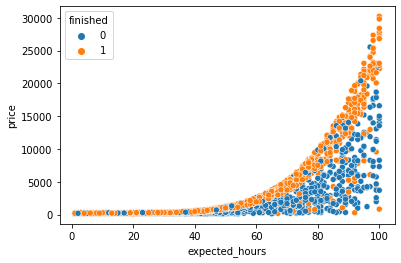

In [ ]:
import seaborn as sns
#expected_hours, price = x
#finished = y
                #eixos x e y do ghapic         #cor 0/1          
sns.scatterplot(x="expected_hours", y="price", hue = "finished",  data=dados)
x = dados[["expected_hours", "price"]]
y = dados["finished"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

#separador test/treino
SEED = 4
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.10, stratify = y)

#treino  linear(não eficiente)
modelo = LinearSVC()
modelo.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
#test / validação
predict = modelo.predict(test_x)
validade = accuracy_score(test_y, predict)
print("%.2f%%" %(validade * 100))

56.48%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


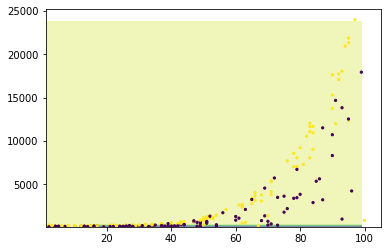

In [ ]:
import numpy as np
#eixo x do grafico 0/100 horas
x_min, x_max = test_x.expected_hours.min(), test_x.expected_hours.max()
#eixo y do grafico de 100/27343 dinheiros
y_min, y_max = test_x.price.min(), test_x.price.max()

pixels = 100
#elementos de x/y mapeado de 100/100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z.shape
#acuracia aleatoria devido ao linearSVC
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=5)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


#treino do escalador
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

modelo = SVC()
modelo.fit(train_x, train_y)
predict = modelo.predict(test_x)

acuracia = accuracy_score(test_y, predict) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 64.81%


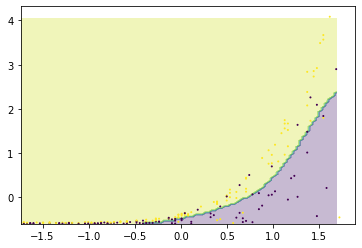

In [ ]:
data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

<h1>dummys</h1>
<b>base de acurácia<b>:

In [ ]:
import pandas as pd
from datetime import datetime
#import ds:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

#padronizando ds:

#bolean "sold"
bol = {"yes": 1, "no": 0}
dados.sold = dados.sold.map(bol)

#quantidade de anos do carro
            #return ano atual
ano_atual = datetime.today().year
dados['model_year'] = ano_atual - dados.model_year

#milhas/km
dados['km_per_year'] = round(dados.mileage_per_year * 1.60934)
dados = dados.drop("mileage_per_year", axis=1)

dados.head()

,Unnamed: 0,model_year,price,sold,km_per_year
0,0,22,30941.02,1,35085.0
1,1,24,40557.96,1,12622.0
2,2,16,89627.50,0,11441.0
3,3,7,95276.14,0,43167.0
4,4,8,117384.68,1,12770.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

y = dados["sold"]
x = dados[["price", "km_per_year", "model_year"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, stratify = y)

In [ ]:
from sklearn.dummy import DummyClassifier
#mais frequencia de resultados
dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(x_train, y_train)
acuracia = dummy_mostfrequent.score(x_test, y_test) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [ ]:
from sklearn.dummy import DummyClassifier
#dummy base escala 
dummy_stratified = DummyClassifier()
dummy_stratified.fit(x_train, y_train)
acuracia = dummy_stratified.score(x_test, y_test) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


<h1>árvore de decisão</h2>
<b><q>visualização de decisões</q></b>

In [ ]:
#visualizador
!pip install graphviz==0.10
!apt-get install graphviz

In [2]:
import pandas as pd
from datetime import datetime
#import ds:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

#padronizando ds:

#bolean "sold"
bol = {"yes": 1, "no": 0}
dados.sold = dados.sold.map(bol)

#quantidade de anos do carro
            #return ano atual
ano_atual = datetime.today().year
dados['model_year'] = ano_atual - dados.model_year

#milhas/km
dados['km_per_year'] = round(dados.mileage_per_year * 1.60934)
dados = dados.drop("mileage_per_year", axis=1)

dados.head()

,Unnamed: 0,model_year,price,sold,km_per_year
0,0,22,30941.02,1,35085.0
1,1,24,40557.96,1,12622.0
2,2,16,89627.50,0,11441.0
3,3,7,95276.14,0,43167.0
4,4,8,117384.68,1,12770.0


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

y = dados["sold"]
x = dados[["price", "km_per_year", "model_year"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, stratify = y)

In [7]:

         #estimador(arvore)    #maximo de galhos  
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(x_train, y_train)
previsoes = modelo.predict(x_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 81.60%


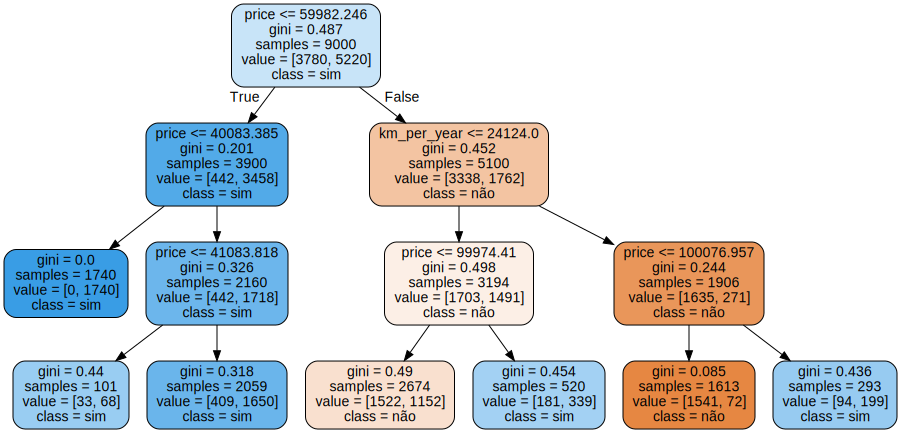

In [8]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico